<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/hachioji_temp_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving hachioji-temp-data.csv to hachioji-temp-data.csv


In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('hachioji-temp-data.csv', encoding='SHIFT-JIS', header=2)
# PandasのDataFrameという形式で読み込まれる
# 文字コードはSHIFT-JIS, 官公庁のオープンデータや，歴史が古い企業のデータはエクセルから書き出すものが多いからか，SHIFT-JISが多い．
# このheader=2は頭から2行分は不要な情報なので読み飛ばす，という意味

df.head()
# チェック用として，頭の部分だけ表示

# DataFrameでは，この状態で一番上の行が「列の名前」として認識され，操作することができる．
# 列の名前になっているので，この行を行番号では操作できなくなる．

,年月,日最高気温の平均(℃),日最高気温の平均(℃).1,日最高気温の平均(℃).2,日最低気温の平均(℃),日最低気温の平均(℃).1,日最低気温の平均(℃).2,平均気温(℃),平均気温(℃).1,平均気温(℃).2
0,NaN,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号
1,1977/8,27.4,5,1,20.8,5,1,23.7,8,1
2,1978/8,33.1,8,1,22.3,8,1,27.4,8,1
3,1979/8,30.5,5,1,22.3,5,1,25.9,8,1
4,1980/8,25.8,8,1,19.5,8,1,22.4,8,1


In [0]:
# 列の名前が入っている行の下に余計なものが一つあったので(行番号0になる)，削除
df = df.drop(0)
df.head()

,年月,日最高気温の平均(℃),日最高気温の平均(℃).1,日最高気温の平均(℃).2,日最低気温の平均(℃),日最低気温の平均(℃).1,日最低気温の平均(℃).2,平均気温(℃),平均気温(℃).1,平均気温(℃).2
1,1977/8,27.4,5,1,20.8,5,1,23.7,8,1
2,1978/8,33.1,8,1,22.3,8,1,27.4,8,1
3,1979/8,30.5,5,1,22.3,5,1,25.9,8,1
4,1980/8,25.8,8,1,19.5,8,1,22.4,8,1
5,1981/8,29.5,8,1,20.8,8,1,24.9,8,1


In [0]:
# 「日最高気温の平均(℃)」列のみを抽出
# 1次元目の「:」は行のインデックスが「0~ある」だけ
df = df.loc[:, ['日最高気温の平均(℃)']]
df.head()

,日最高気温の平均(℃)
1,27.4
2,33.1
3,30.5
4,25.8
5,29.5


説明変数Xの形状 (42, 1)
説明変数Yの形状 (42, 1)


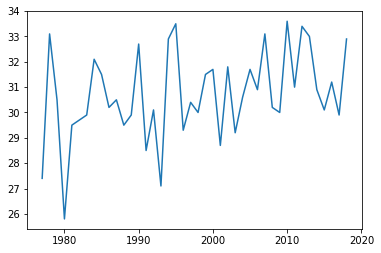

In [0]:
# 説明変数は，その西暦年年にする
# 今は説明変数が「西暦年」1つなので，西暦年1次元のNumpy配列(1977~2018)を作る．
# np.arange(a, b)は，aからb-1までの整数のNumpy配列を作る関数
# 重回帰分析をするためには，複数の説明変数が必要となるので，基本2次元配列を取ることになる．
# そこでreshape(42, 1)を使って，無理やり2次元のNumpy配列にして格納する．
X = np.arange(1977, 2019).reshape(42, 1)

# 目的変数を 「日最高気温の平均(℃)」にする
#printすると，なぜかケツにNanが入っていることがあるのでので，これを取り除く
y_temp = np.logical_not(pd.isnull(df))
mask = np.logical_and(np.cumsum(y_temp)!=0, np.cumsum(y_temp[::-1])[::-1]!=0)
df = df.loc[mask['日最高気温の平均(℃)'].tolist()]

# 目的変数は「1つ」なので，必ず1列になるので，「データは1次元」，「全体として2次元」であることを確認する
# DataFrameのvaluesという変数には，Numpyの2次元配列が入っているので，これを用いる
Y = df.values

# 説明変数と目的変数の行列の形状を確認する
#（現在は説明変数一つなので，同じになっている必要がある）
print('説明変数Xの形状', X.shape) #(サンプル数, 説明変数の数(今は1))になっている必要がある
print('説明変数Yの形状', Y.shape) #目的変数なので， (サンプル数， 1)になっている必要がある

#一度グラフに表示してみる
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.show()

回帰係数(傾き): [[0.05160846]]
切片: [-72.38551711]
決定係数 0.12643083363467078


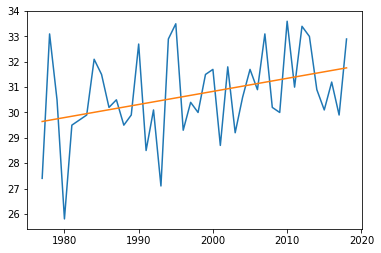

In [0]:
import scipy
import sklearn
from sklearn import linear_model

# 回帰分析するクラスのインスタンスを作る
ols_model = linear_model.LinearRegression()

# 回帰分析を走らせる（学習する)
ols_model.fit(X, Y)

# 結果を出力していく
# 回帰係数(傾き)
print('回帰係数(傾き):', ols_model.coef_)
 
# 切片 (誤差)
print('切片:', ols_model.intercept_)
 
# 決定係数
print('決定係数', ols_model.score(X, Y))
# データにどのぐらいフィットしているかを表す値

# グラフを表示
# まず観測値を再度プロットする
plt.plot(X, Y)
# 次に回帰分析した結果をプロットする
# 回帰分析インスタンスのpredict関数に説明変数Xを入れると，予測した目的変数を出してくれる
predictedY = ols_model.predict(X)
# それを表示
plt.plot(X, predictedY)
# 表示
plt.show()

以下はstatsmodelsを使った単純線形回帰．

結果はscikit-learnのものとほぼ同じだが，統計的な情報が詳しく出るので，こちらも実行しておく．

ただし，こちらはpredictをするのに余計な手間がいるので不便．（統計情報を出すのがメインなので）

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     5.789
Date:                Wed, 21 Aug 2019   Prob (F-statistic):             0.0208
Time:                        11:01:05   Log-Likelihood:                -80.482
No. Observations:                  42   AIC:                             165.0
Df Residuals:                      40   BIC:                             168.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -72.3855     42.846     -1.689      0.0

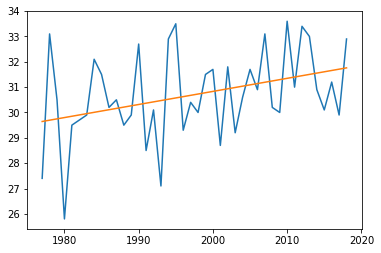

In [0]:
import statsmodels.api as sm
nsamples = Y.shape[0]

ols_model = sm.OLS(Y, sm.add_constant(X))
ols_result = ols_model.fit()

print(ols_result.summary())

predictedY = ols_result.predict(sm.add_constant(X))
plt.plot(X, Y)
plt.plot(X, predictedY)
plt.show()